# Coursera Capstone Project

## The Battle of Neighborhoods - Final Assignement

## Gaby  Bou Tayeh


### Import the required libraries

In [62]:
import numpy as np 
import time
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')



print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


### The Notebook's Content

1.	Introduction: 
	
    1.1 Motivation and background
    
    1.2 Objective
    
    1.3 Targeted audience
    
    
2.	Data analysis:  

    2.1 Description of the used data
    
    2.2 How the Data can serve our objective?
    
    
3.	Methodology 

    
4.	Results
    
    
5.	Discussion
    
    
6.	Conclusion

# 1.	Introduction


### 1.1 Motivation and background

###### Backgroud:
I am a third year PhD student currently living in Paris. Paris is a living city with lot of diverse venues, in addition the public transportation in Paris is very efficient and well managed, It is very easy to go from point A to point B regardless of the location of these two points. However, renting an appratement in Paris is very expensive, and it varies highly according to the borough number. 

###### Motivation:
I have been offered a great opportunity to work in Manhattan, NY. Although, I am very excited about it, but, I want to make sure to find a fairly similar neighborhood to the one I am currently living at. I am interrested in venues, metro station proximity, and appartement prices. On a personal level, I belive that this project is a good practical case towards the development of my Data Science skills.


### 1.2  Objective:   

My objective is to to find an appratement to rent in Manhattan NY under certain conditions:
- The apprtement rental price should be within my 7000-8000 US $ Budget.
- The Neighborhood where the appartement is located should have roughly similar venues to the one I am currently living in.
- The appartement should not be too far from the nearest metro station (within 500m).

### 1.3 Targeted audience
I believe that this is a relevant project for a person or an entity considering moving to a major city in Europe, US or Asia. The approach and methodologies used in this Notebook could be adapted and applied for cities other than Manhatan. The use of FourSquare data and mapping techniques combined with data analysis will help us decide which appartement to rent.


# 2. Data Analysis

### 2.2 Description of the used data
In order to take a final decision on which appartement to rent in Manhattan NY, the following data is required:
- Information on Manhatan's neighborhoods along side the coordinates of each neighborhood(latitud,longitud).
- Information on the subway metro stations in Manhattan (location, coordinates).
- a List of apartments that are published for rent in Manhattan area with descriptions (price, location, address, etc..)
- List of venues and ammenities in the Manhattan neighborhoods (e.g. top 10)

2.3 Data sources
- The list of Manhattan neighborhoods is worked out during Lab exercise of the applied data science course (A csv file containting the final results was saved locally which will be retrieved later and read into a Pandas Dataframe). a part of the csv file 'mh_neigh_data.csv' content is illustrated below.

mh_neigh_data.tail():

              Borough    Neighborhood    Latitude    Longitude

          35    Manhattan    Turtle Bay    40.752042    -73.967708

          36    Manhattan    Tudor City    40.746917    -73.971219

          37    Manhattan    Stuyvesant Town    40.731000    -73.974052

          38    Manhattan    Flatiron    40.739673    -73.990947

          39    Manhattan    Hudson Yards    40.756658    -74.000111
  
- A list of Manhattan subway metro station was prepared and it was completed by scrapping data from this wikipedia page( https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan). Additional information where also scrapped from NY Transit authority and Google maps (https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1). The geolocation of the station were obtained using Nominatim. Details will be shown later in the Notebook. The subway csv file is ''MH_subway.csv'" and below is an illustration of a part of it: 

mhsub.tail():
               sub_station                    sub_address                         lat        long

      17    190 Street Subway Station    Bennett Ave, New York, NY 10040, USA    40.858113    -73.932983

      18    59 St-Lexington Av Station    E 60th St, New York, NY 10065, USA        40.762259    -73.966271

      19    57 Street Station    New York, NY 10019, United States                40.764250    -73.954525

      20    14 Street / 8 Av    New York, NY 10014, United States                40.730862    -73.987156

      21    MTA New York City    525 11th Ave, New York, NY 10018, USA            40.759809    -73.999282


- A list of appartements for rent was collected by web-browsing real estate companies in Manhattan : http://www.rentmanhattan.com/index.cfm?page=search&state=results https://www.nestpick.com/search?city=new-york&page=1&order=relevance&district=manhattan&gclid=CjwKCAiAjNjgBRAgEiwAGLlf2hkP3A-cPxjZYkURqQEswQK2jKQEpv_MvKcrIhRWRzNkc_r-fGi0lxoCA7cQAvD_BwE&type=apartment&display=list https://www.realtor.com/apartments/Manhattan_NY
A csv file ("MH_flats_price.csv") was compiled indicating: location of the appartment (Area), address, number of beds, and monthly rental price. Nominatim is used again to retrieve the coordinates (lat, long) of each appartement.

- The "Great_circle" function from geolocator was used to enable the user to measure the distance between two points (distance from an appartement to a metro station)

- THE Foursquare API is used to find the venues in Manhattan's neighborhoods. 
- The neighborhood are then clusterd using Kmeans++ according to their similarities.


### 2.4 How the Data can serve our objective?
The data will be used as follows:

The Nominatim (from geopy) and the Foursquare API will be used to retrieve the coordinates of the clustered neighborhoods, appartements, metro station and display them on an interactive map using Folium. Information about the name of each neighborhood and borough, the price of each appartement, and the distance between appartements and their nearest metro station will be easly accesible using the interactive map. All this information will help us decide which appartement to rent.


## 3. Methodology

The strategy is to diplay the previously described datasets on an interactive map in order to facilitate the decision making for appartement rental in Manhattan NY. First, the data need to be pre-processed(collected, analysed, cleaned, merged, etc..). In the following section we will walk through the data pre-processing phase.

## Paris Map - Venues in neighborhoods
for future comparison with Manhattan

In [21]:
# Shenton Way, District 01, Singapore
address = 'Paris'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


## Using FourSquare to find venues around current residence in Paris

In [22]:
# @hidden_cell
CLIENT_ID = 'Y4D45LFFDWSCZTHBZD0S3LSK2IUHROKHMGN2T3YSF4UWVHV1' # your Foursquare ID
CLIENT_SECRET = 'ZBO12MVGCDDBBZRQGRTGGM5VBLHEJZ1TTZAX2GN32OOEBXCM' # your Foursquare Secret
VERSION = '20200327' # Foursquare API version

In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Y4D45LFFDWSCZTHBZD0S3LSK2IUHROKHMGN2T3YSF4UWVHV1&client_secret=ZBO12MVGCDDBBZRQGRTGGM5VBLHEJZ1TTZAX2GN32OOEBXCM&v=20200327&ll=48.8566969,2.3514616&radius=500&limit=100'

In [16]:
# results display is hidden for report simplification 
results = requests.get(url).json()

#### function that extracts the category of the venue - borrow from the Foursquare lab.

In [17]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
PAnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
PAnearby_venues =PAnearby_venues.loc[:, filtered_columns]
# filter the category for each row
PAnearby_venues['venue.categories'] = PAnearby_venues.apply(get_category_type, axis=1)
# clean columns
PAnearby_venues.columns = [col.split(".")[-1] for col in PAnearby_venues.columns]

PAnearby_venues.shape

(100, 4)

In [24]:
# Venues near current Singapore residence place
PAnearby_venues.head(10)

,name,categories,lat,lng
0,Place de l'Hôtel de Ville – Esplanade de la Li...,Plaza,48.856925,2.351412
1,Parc Rives de Seine,Park,48.855510,2.351419
2,L'Alsacien,Alsatian Restaurant,48.858275,2.350381
3,Berges de Seine – Rive droite,Pedestrian Plaza,48.855131,2.352289
4,Square de la Tour Saint-Jacques,Park,48.857882,2.348757
5,BHV Marais,Department Store,48.857312,2.353633
6,Maison Aleph,Pastry Shop,48.857348,2.354873
7,Tour Saint-Jacques,Historic Site,48.858031,2.348875
8,Lucky Records,Record Shop,48.858556,2.351442
9,Galerie Azzedine Alaïa,Art Gallery,48.857545,2.355217


## Map of Singapore residence place with venues in Neighborhood - for reference

In [27]:
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map
for lat, lng, label in zip(PAnearby_venues['lat'], PAnearby_venues['lng'], PAnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

# Exploring Manhatan neighborhoods
##  A csv file of the clustered neighborhoods from the previous Notebooks (Part3) was saved locally. Now, the csv file is just read for convenience and consolidation of report.

In [28]:
# Read csv file with clustered neighborhoods with geodata
manhattan_data  = pd.read_csv('mh_neigh_data.csv') 
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [29]:
manhattan_data.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


# We do the same for the dataframe containing the clusterd Neighborhood data data includes the top 10 venues too


In [30]:
manhattan_merged = pd.read_csv('manhattan_merged.csv')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


# Map of Manhattan neighborhoods with top 10 clustered venues

In [31]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [32]:
# create map of Manhattan using latitude and longitude values from Nominatim
kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

# Map of appartement to rent in Manhattan
## The data have been scrapped from various real estate websites, the results are then merged into a single CSV file that was saved locally.

### The initial data for the total of 144 apartment did not include the latitude and longitude of each appartement (NaN). However, using Nominatim we extracted the coordinates and added them to the  mh_rent Dataframe.

In [33]:
mh_rent=pd.read_csv('MH_flats_price.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [34]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


## getting the geodata(lat,long) for each rental place in Manhattan using Nominatim

### The dataframe was saved to a csv file (MH_rent_Latlong.csv).

This is the function used to collected the geodata for the appartement, it takes a lot of time to run this function correctly. That is why the results were finally saved into a csv file to faciliate future runs of this Notebook.  

for n in range(len(mh_rent)):   
    address= mh_rent['Address'][n]
    address=(mh_rent['Address'][n]+ '  , '+' Manhattan NY ')
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    mh_rent['Lat'][n]=latitude
    mh_rent['Long'][n]=longitude
    #print(n,latitude,longitude)
    time.sleep(2)

print('Geodata completed')


##### save dataframe to csv file
mh_rent.to_csv('MH_rent_latlong.csv',index=False)
mh_rent.shape

In [35]:
mh_rent=pd.read_csv('MH_rent_latlong.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [36]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,40.769465,-73.960339
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,40.714051,-74.009608
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,40.758216,-73.965190
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,40.772474,-73.981901
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,40.733691,-73.997323


# Let's do a quick analysis for the prices of Manhattan's apartments
### The mean value is approximatly 7000 US Dollars per month.

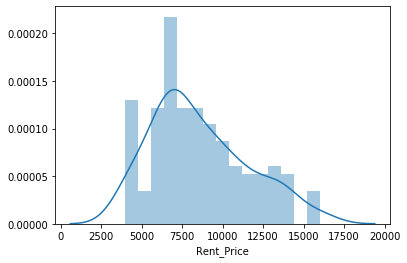

In [38]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

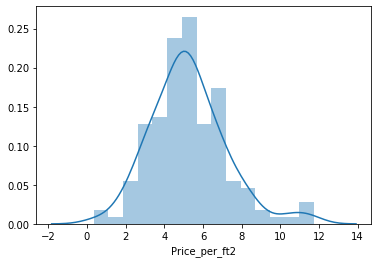

In [42]:
# it follows a normal distribution
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

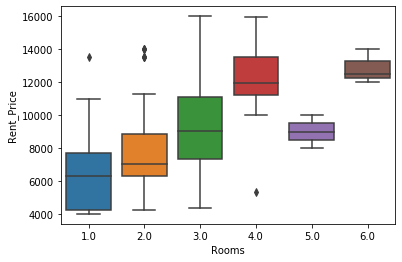

In [41]:
# there is indeed a visible correlation between the number of rooms and the price of the appartments (5 romms is an exception)
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

# Let's visulize these apaprtements on a map using folium
### The labels (popups) will indicate the address and the monthly price for rent thus making it convenient to select the appartment with the target rent price

In [43]:
# create map of Manhattan using latitude and longitude values from Nominatim

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

# Let's visulise both the cluster venues and the appartements on the same map.
### This is a useful for exploring appartements in the desird neighborhoods.

In [47]:
# create map of Manhattan using latitude and longitude values from Nominatim
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2


# Instead of exploring each neighborhood, looking at all the venues and comparing rental prices manually. This map says it all. Easy and straightforward.

## We can easly find an appartment having the right rental price and located in a desirable neighborhood. 

## Now let's add the subway metro station. It would be worth paying a little more for an appartement in a similar neighborhood if it is closer to a subway station.


#### The Manhattan subway metro locations were obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit.  For simplification, a csv file was put together and saved locally.

# Mapping Manhattan Subway Stations

In [48]:
mh=pd.read_csv('NYC_subway_list.csv')
mh.head()

,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


### Add colums labeled 'lat' and 'long' to be filled with geodata

In [49]:
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

## The Algorithme used to find latitude and longitud of each subway metro station and add them to dataframe

for n in range(len(mh)):
    address= mh['sub_address'][n]
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    mh['lat'][n]=latitude
    mh['long'][n]=longitude
    #print(n,latitude,longitude)
    time.sleep(2)

print('Geodata completed')
#### save dataframe to csv file
mh.to_csv('MH_subway.csv',index=False)
mh.shape

## Read csv containig the infomation about the subway stations

In [50]:
mh=pd.read_csv('MH_subway.csv')
print(mh.shape)
mh.head()

(76, 4)


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [51]:
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape

(22, 4)

In [52]:
mhsub1.tail()

,sub_station,sub_address,lat,long
17,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
19,57 Street Station,"New York, NY 10019, United States",40.764250,-73.954525
20,14 Street / 8 Av,"New York, NY 10014, United States",40.730862,-73.987156
21,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


## MAP of Manhattan showing the location of subway stations

In [53]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

# Map of Manhattan showing places for rent and the subway locations nearby

## Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.
### Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station


In [54]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [55]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

# 4 Results

## One consolidated map
### Let's consolidate all the required inforamtion to make the apartment selection in one map


# Map of Manhattan with rental places, subway locations and cluster of venues
###  Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues

In [56]:
# create map of Manhattan using latitude and longitude values from Nominatim
map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

# Problem Resolution - Select the best apartment to rent

## The above consolidate map was used to explore our options.  
### Let's say I am interested in living in neighborhoods belonging to Cluster 2 (close to the one I currently live in in Paris). And my budget is limite to 7000-8000 US Dollars a mont. 

## Here are 3 options (there are obviously more, I will just give 3 examples)

### 1- Neighborhood: Soho, appartement address: 93 Grand Street, Price: 6900, distance to nearest subway station: 461 m.

### 2- Neighborhood: Sutton Place, appartement address: 221 East Str60th Street, Price: 8000, distance to nearest subway station: 106 m.


### 3- Neighborhood: Morningside Heights, appartement address: 1080 Amsterdam Avenue, Price: 7792, distance to nearest subway station: 2297 m.

### option 3 is not to be considered! too far away from a subway station (time is money). 
### Am i willing to pay 1100 US dollars more to live in an appratement that is closer to a subway station (option 2).
### I don't think it worth it, walking a 300m hundred meters (roughly 4 minutes) to save 1100 dollars is a good deal.

### Therefore I will stick to option 1
 

## Venues for Option 1 - Cluster 2

In [61]:
manhattan_merged.loc[manhattan_merged['Neighborhood'] == 'Soho' , manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio


# 5 DISCUSSION

## Things that could be added to improve our choice of location:
## 1 - Population density 
## 2 - Ditance to work location
## 3-  Crime rates per neighborhoods(seen in previous lab exercices)

# 6 CONCLUSIONS

## In this Notebook I present a comprehensiblen easy to use tool that enables a person moving to Manhattan to find similar neighborhoods to the one he is currently living in with the right rental price. For future work, more features could be added, such as population density, crimes rates in each neighborhood, and distance to work form each appartements.

## End of the Project and Applied Data Science Specialization.
## Thanks to the Coursera team, students, and the lecturers :)